In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

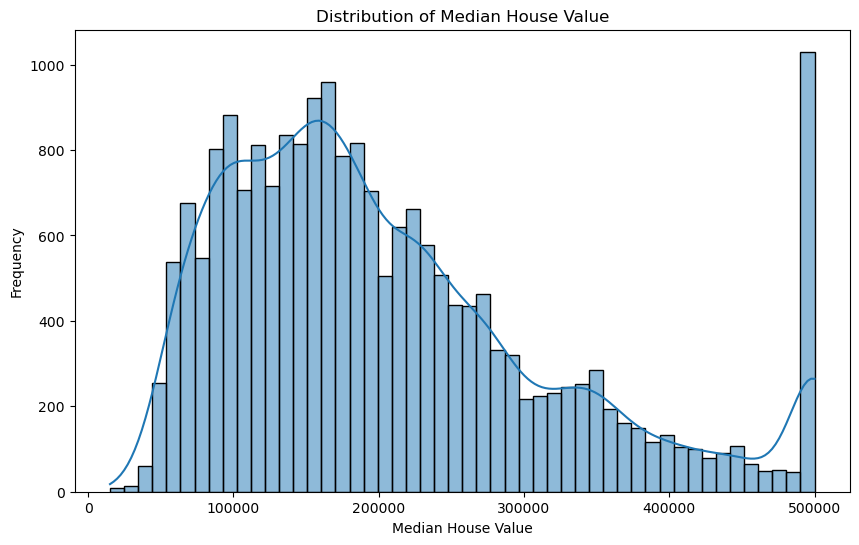

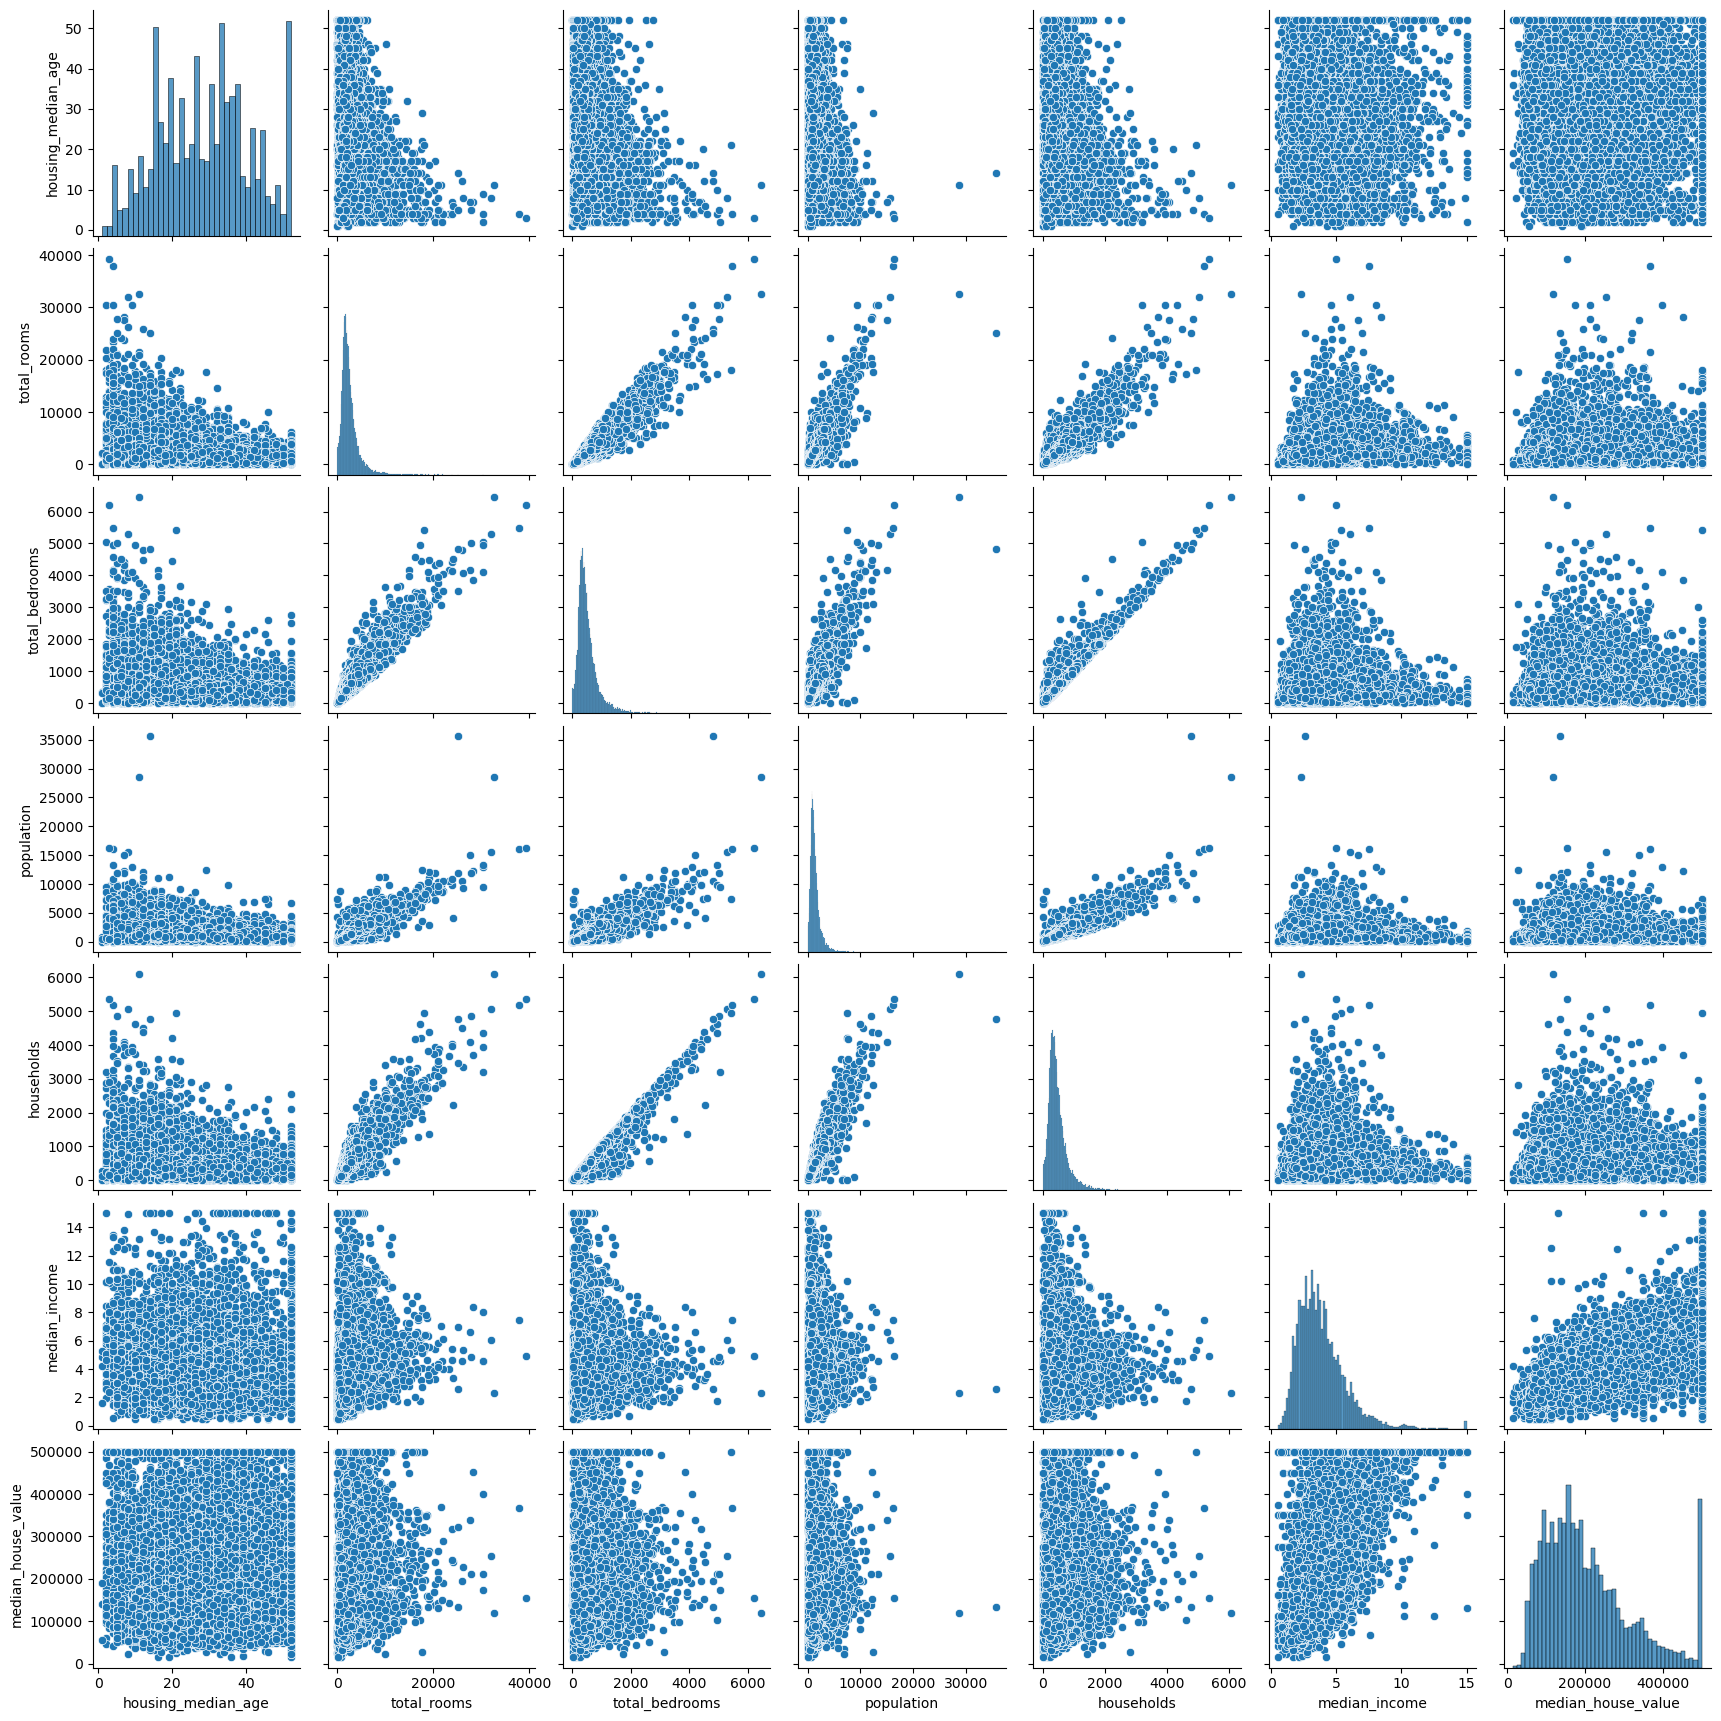

C:\Users\Shaheer Ahmed Khan\AppData\Local\Temp\ipykernel_26276\2772587184.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


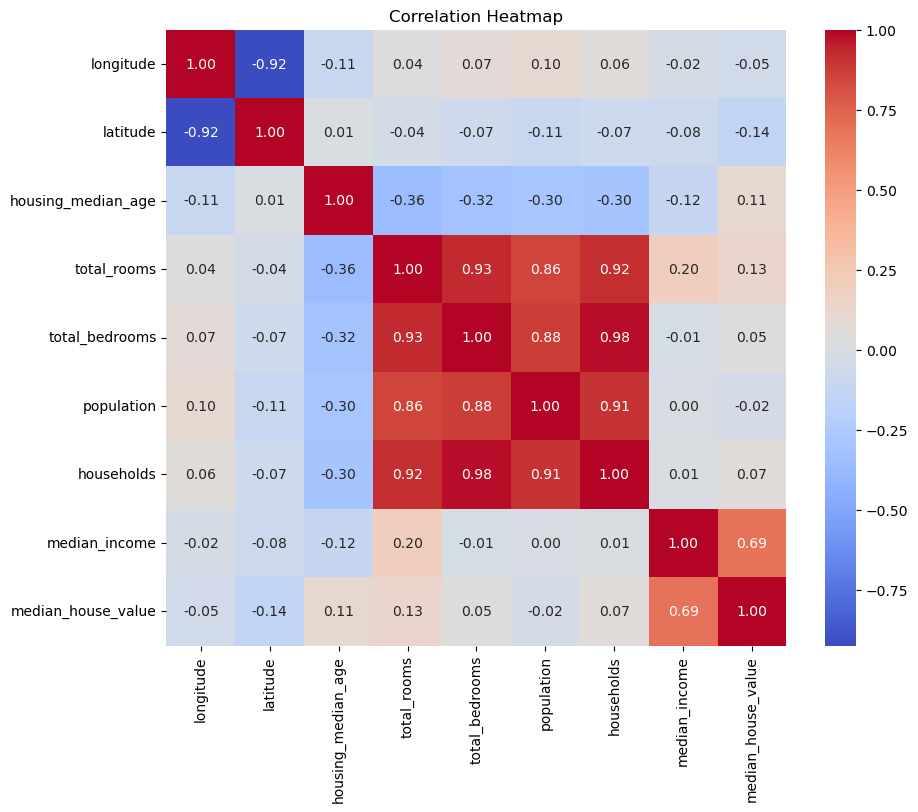

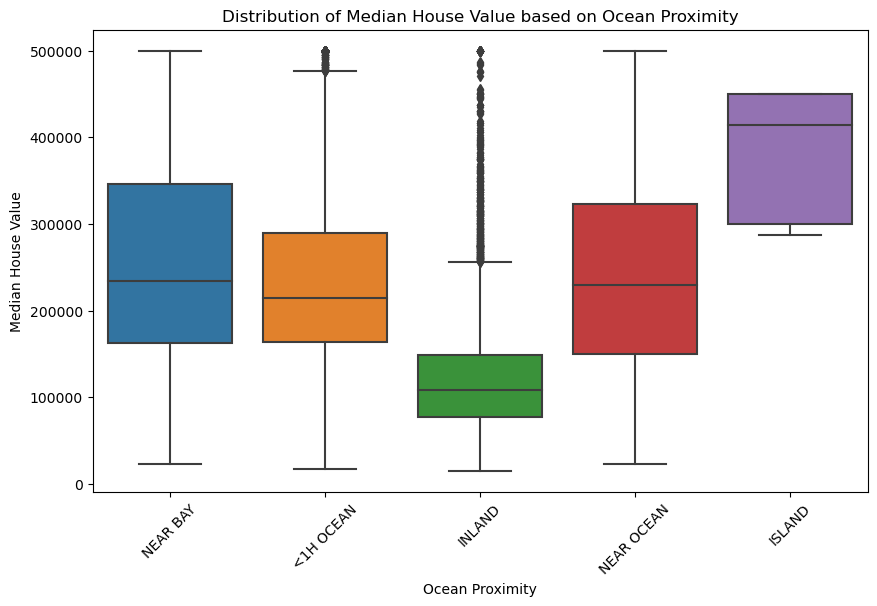

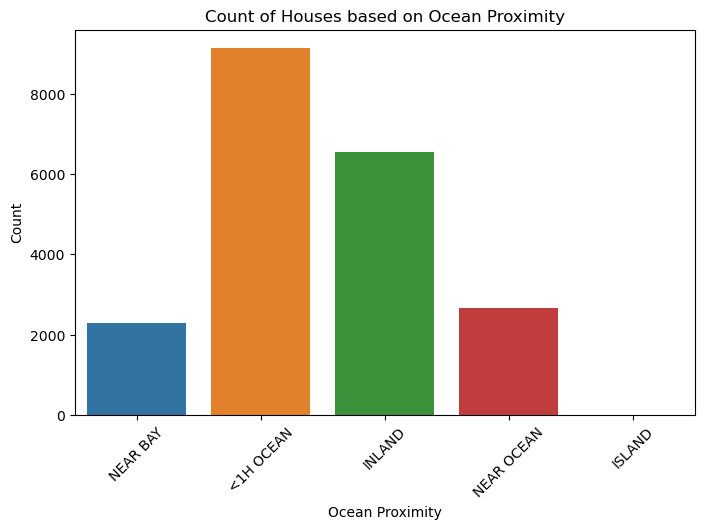

In [55]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset to get an overview
print(df.head())

# Check the data types and missing values in the dataset
print(df.info())

# Summary statistics of numerical columns
print(df.describe())

# EDA - Visualization

# Distribution of median_house_value (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])
plt.show()

# Correlation heatmap to check the correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot to visualize the distribution of median_house_value based on ocean_proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Distribution of Median House Value based on Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

# Countplot for ocean_proximity to see the frequency of each category
plt.figure(figsize=(8, 5))
sns.countplot(x='ocean_proximity', data=df)
plt.title('Count of Houses based on Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [56]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Separate features and target variable
x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocessing: One-hot encode the ocean proximity column

ocean_proximity_encoder = OneHotEncoder()
x_train_encoded = ocean_proximity_encoder.fit_transform(x_train[['ocean_proximity']])
x_test_encoded = ocean_proximity_encoder.transform(x_test[['ocean_proximity']])

# Convert the encoded sparse matrix back to a DataFrame

x_train_encoded_df = pd.DataFrame(x_train_encoded.toarray(), columns=ocean_proximity_encoder.get_feature_names_out(['ocean_proximity']))
x_test_encoded_df = pd.DataFrame(x_test_encoded.toarray(), columns=ocean_proximity_encoder.get_feature_names_out (['ocean_proximity']))

# Drop the original ocean proximity column and concatenate the encoded columns

x_train = pd.concat([x_train.drop('ocean_proximity' , axis=1), x_train_encoded_df], axis=1) 
x_test = pd.concat ([x_test.drop('ocean_proximity' , axis=1), x_test_encoded_df], axis=1)

# Impute missing values with the mean

imputer = SimpleImputer(strategy= 'mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Standardize the features for SUN and KIN

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Re-index y train to match the re-indexed * train

y_train = y_train.reset_index (drop=True)

In [62]:
#initialize the models
models = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    AdaBoostRegressor(),
    MLPRegressor(max_iter=1000)
]
#Train and Evaluate
models = [LinearRegression(), SVR(kernel='linear'), KNeighborsRegressor(n_neighbors=5), DecisionTreeRegressor(random_state=42),AdaBoostRegressor(random_state=42),
    MLPRegressor(random_state=42)]

for model in models:
    model_name = model.__class__.__name__
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    rmse = means_squared_error(y_test, y_pred, squared=False)
    print(f"{model_name} MSE: {rmse}")

ValueError: Found input variables with inconsistent numbers of samples: [19838, 16512]